In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_churn = pd.read_csv('Telecom.csv')

In [34]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
# Droppinig customerID
# Replacing 1/0 in 'seniorCitizen' with Yes/No
# Replacing Yes/No in the target variable (Churn) with 1/0

df_churn.drop('customerID', axis=1, inplace=True)
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].map({0:'No', 1:'Yes'})
df_churn['Churn'] = df_churn['Churn'].map({'No':0, 'Yes':1})

In [36]:
# Having a look at the data types

df_churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [37]:
# 'TotalCharges' is supposed to be  numerical, but it's an onject
# We will convert it into numerical data type

df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# Checking its datatype
df_churn['TotalCharges'].dtypes

dtype('float64')

In [38]:
# Checking whether we have any missing values

df_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
# Total Charges has 11 missing values
# We will drop the rows with missing data and check for missing values again

df_churn = df_churn.dropna()
df_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

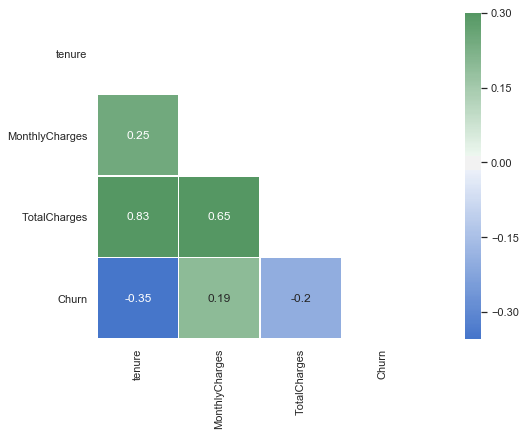

In [40]:
# Using correlation matrix to understand the correlation between numerical variables


import seaborn as sns


df_corr = df_churn.corr()

sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

In [41]:
# We can observe that 'TotalCharges' has high positive correlation with 'tenure' and 'MonthlyCharges'
# Hence, we will remove 'TotalCharges' from the dataframe

df_churn.drop('TotalCharges', axis=1, inplace=True)

# Checking whether 'TotalCharges' has been removed
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


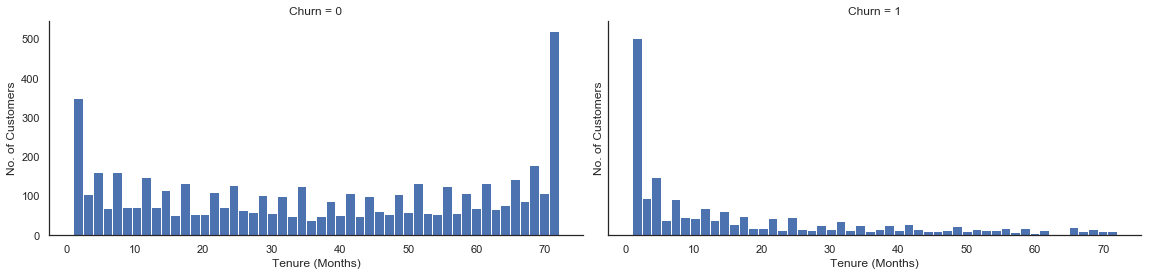

In [43]:
# Distribution of Tenure


tenure = sns.FacetGrid(data=df_churn, col='Churn', height=4, aspect=2)
tenure.map(plt.hist, 'tenure', bins=50)


tenure.set(xlabel='Tenure (Months)', ylabel='No. of Customers')
plt.show()

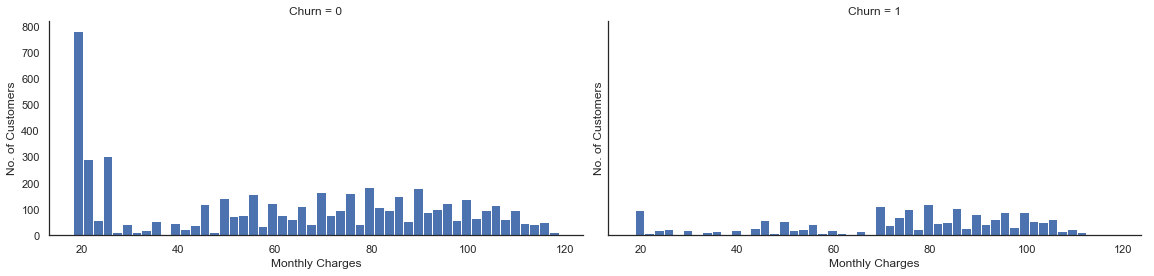

In [44]:
# Distribution of Monthly Charges

monthly = sns.FacetGrid(data=df_churn, col='Churn', height=4, aspect=2)
monthly.map(plt.hist, 'MonthlyCharges', bins=50)


monthly.set(xlabel='Monthly Charges', ylabel='No. of Customers')
plt.show()

In [45]:
# Customer appears to churn away more when monthly charges are high.
# We can present the plots above more intuitively using Kernel Density Estimate Plot

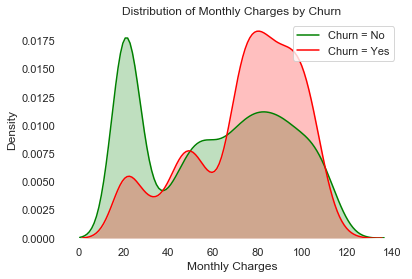

In [46]:
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 0) ],
                color="Green", shade = True)
ax = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Churn = No","Churn = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)


# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

In [47]:
# Here it's evident that customers are more likely to churn when the Monthly Charges are high

[None, None, None, None]

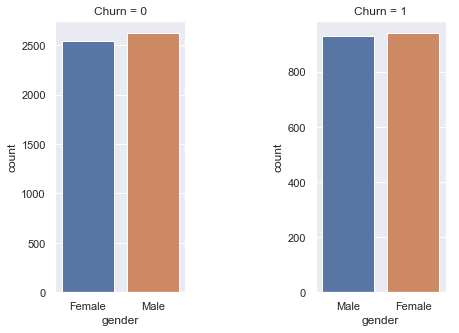

In [48]:
# Gender

df_churn_y = df_churn[df_churn['Churn']==1]
df_churn_n = df_churn[df_churn['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_churn_n['gender'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_churn_y['gender'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")


In [49]:
# The male:female ratio is constant across the customer who have churned away and those who haven't
# Hence, it seems that gender does not have an impact on churn rates

[None, None, None, None, None, None]

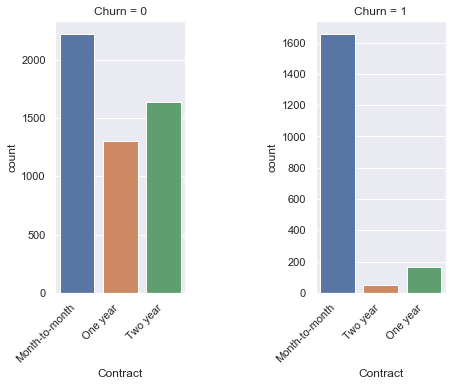

In [50]:
# Contract Type

df_churn_y = df_churn[df_churn['Churn']==1]
df_churn_n = df_churn[df_churn['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_churn_n['Contract'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.countplot(df_churn_y['Contract'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right")


In [51]:
# The proportion of M0nth-to-Month contract is distinctly high among the customers who have churned away

[None, None, None, None]

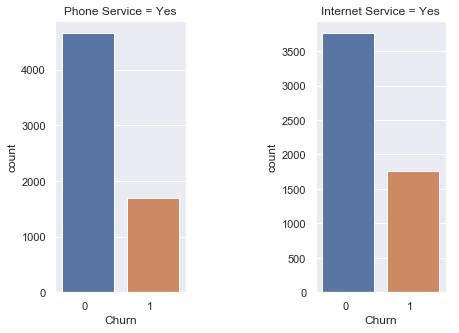

In [52]:
# Phone Service and Internet Service

df_phone = df_churn[df_churn['PhoneService']=='Yes']
df_internet = df_churn[df_churn['InternetService']!='No']


fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_phone['Churn'], ax=ax[0])
ax[0].set_title('Phone Service = Yes')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="right")

sns.countplot(df_internet['Churn'], ax=ax[1])
ax[1].set_title('Internet Service = Yes')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="right")


In [53]:
# Among the users of Phone and Internet Service, the proportions of the customers churning are pretty close

[None, None, None, None]

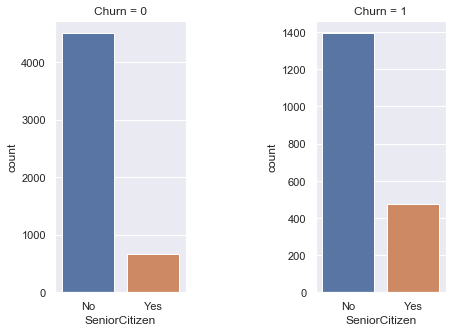

In [54]:
# Senior Citizens

# Gender

df_churn_y = df_churn[df_churn['Churn']==1]
df_churn_n = df_churn[df_churn['Churn']==0]

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_churn_n['SeniorCitizen'], ax=ax[0])
ax[0].set_title('Churn = 0')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_churn_y['SeniorCitizen'], ax=ax[1])
ax[1].set_title('Churn = 1')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")


[None, None, None, None]

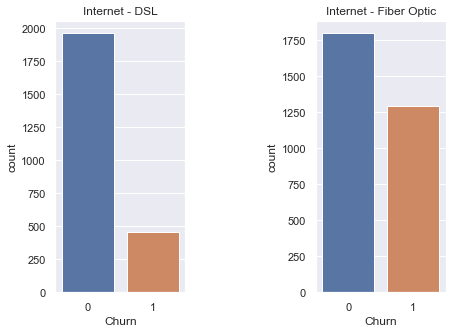

In [55]:
# Users of DSL and Fiber Optic Internet Service

df_dsl = df_churn[df_churn['InternetService']=='DSL']
df_fiber = df_churn[df_churn['InternetService']=='Fiber optic']

fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace=1)


sns.countplot(df_dsl['Churn'], ax=ax[0])
ax[0].set_title('Internet - DSL')
plt.setp(ax[0].get_xticklabels(), rotation=0, ha="center")

sns.countplot(df_fiber['Churn'], ax=ax[1])
ax[1].set_title('Internet - Fiber Optic')
plt.setp(ax[1].get_xticklabels(), rotation=0, ha="center")


In [56]:
# It is clearly visible that the proportion of customers churning is higher the users of the Fiber optic internet 

Text(0, 0.5, 'Monthly Charges ($)')

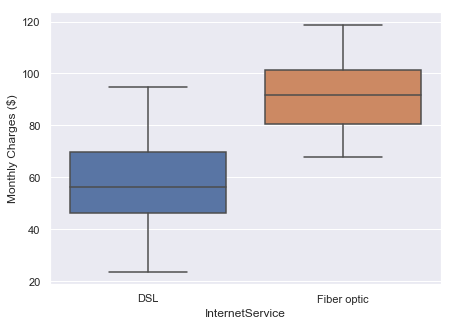

In [57]:
# let's check the prices of the DSL and Fiber Optic Internet Services using boxplot

df_dsl_fiber = df_churn[df_churn['InternetService']!='No']

internet = sns.boxplot(x = df_dsl_fiber.InternetService, y = df_dsl_fiber.MonthlyCharges)
internet.set_ylabel('Monthly Charges ($)')

In [58]:
# Fiber optic services are more expensive than the DSL services

In [59]:
# Converting tenure into smaller buckets
bins = [0,6,12,18,24,36,48,60,72,84]
df_churn['Tenure_grouped'] = pd.cut(df_churn['tenure'], bins)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,"(0, 6]"


In [60]:
# Removing the continuous version of tenure

df_churn.drop('tenure', axis=1, inplace=True)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Tenure_grouped
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,"(0, 6]"
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,"(24, 36]"
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,"(0, 6]"
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,"(36, 48]"
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,"(0, 6]"


In [61]:
# Checking the datatypes
df_churn.dtypes

gender                object
SeniorCitizen         object
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
Churn                  int64
Tenure_grouped      category
dtype: object

In [62]:
# Converting the categorical variables into dummy variables

df_dummy = pd.get_dummies(df_churn, drop_first=True)
df_dummy.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,56.95,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42.30,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [63]:
df_churn_model = df_dummy
df_churn_model.head()

,MonthlyCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,"Tenure_grouped_(6, 12]","Tenure_grouped_(12, 18]","Tenure_grouped_(18, 24]","Tenure_grouped_(24, 36]","Tenure_grouped_(36, 48]","Tenure_grouped_(48, 60]","Tenure_grouped_(60, 72]","Tenure_grouped_(72, 84]"
0,29.85,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,56.95,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,53.85,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,42.30,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,70.70,1,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [64]:
# Splitting the data into train and test datasets
# Test will 30% of the orginal dataframe

y = df_churn_model['Churn']
X = df_churn_model.drop('Churn', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [65]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

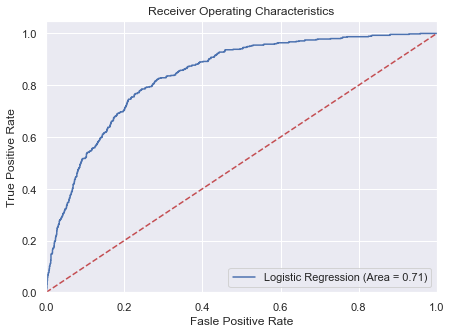

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_logreg = logreg.predict(X_test)

logreg_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' % logreg_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test,y_pred_logreg)
confusion_matrix_logreg

array([[1412,  143],
       [ 269,  286]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
classify_logreg = classification_report(y_test, y_pred_logreg)
print(classify_logreg)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.67      0.52      0.58       555

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



AxesSubplot(0.125,0.125;0.775x0.755)


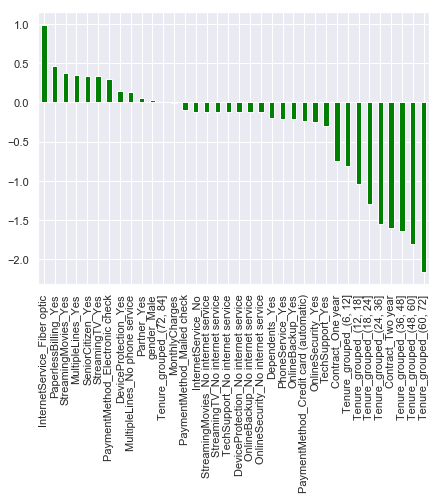

In [69]:
# Weights of the variables

logweights = pd.Series(logreg.coef_[0], index=X.columns.values)
weight_logreg = logweights.sort_values(ascending = False)[:36].plot(kind='bar', color='green')
print (weight_logreg)

In [70]:
# The weights of the variables aligns with the exploratory analysis

# 1. Fiber optic internet service is associated with higher churn rates
# 2. Seniority of the people have a positive relation with churn rates
# 3. Longer tenures have a negative realtionship with churn rates
# 4. Chrun rates diminishes with additional services such as Online backup, Online Security, and Tech support

In [71]:
# Now we will compare the performance of the logistic regression model with those of others
# 1. Decision Tree
# 2. Random Forest
# 3. KNN

In [72]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

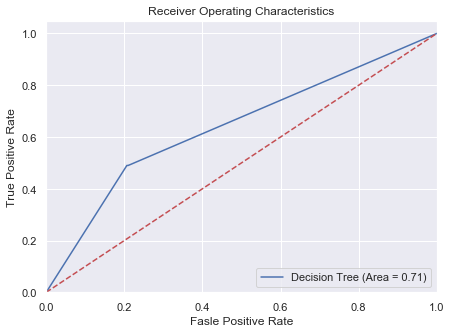

In [73]:
y_pred_dectree = dectree.predict(X_test)

dectree_roc_auc = roc_auc_score(y_test,y_pred_logreg)
fpr, tpr, thresholds = roc_curve(y_test,dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (Area = %0.2f)' % dectree_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('DEC_ROC')
plt.show()

In [74]:
confusion_matrix_dectree = confusion_matrix(y_test,y_pred_dectree)
confusion_matrix_dectree

array([[1234,  321],
       [ 283,  272]], dtype=int64)

In [75]:
classify_dectree = classification_report(y_test, y_pred_dectree)
print(classify_dectree)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1555
           1       0.46      0.49      0.47       555

   micro avg       0.71      0.71      0.71      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.71      0.72      2110



In [76]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=100, random_state=0)
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

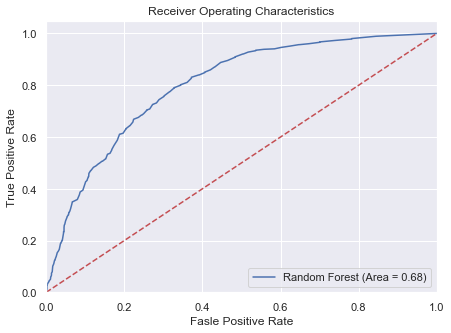

In [77]:
y_pred_ranfor = ranfor.predict(X_test)

ranfor_roc_auc = roc_auc_score(y_test,y_pred_ranfor)
fpr, tpr, thresholds = roc_curve(y_test,ranfor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (Area = %0.2f)' % ranfor_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [78]:
confusion_matrix_ranfor = confusion_matrix(y_test,y_pred_ranfor)
confusion_matrix_ranfor

array([[1377,  178],
       [ 294,  261]], dtype=int64)

In [79]:
classify_ranfor = classification_report(y_test, y_pred_ranfor)
print(classify_ranfor)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1555
           1       0.59      0.47      0.53       555

   micro avg       0.78      0.78      0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



In [80]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

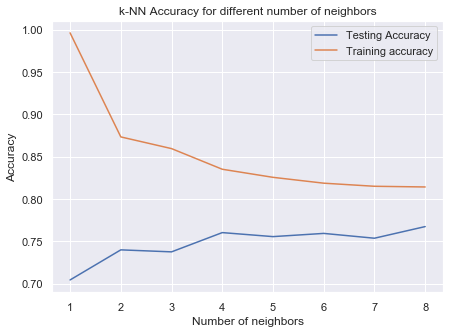

In [81]:
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [82]:
# The accuracy is maximum for n = 8

In [83]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

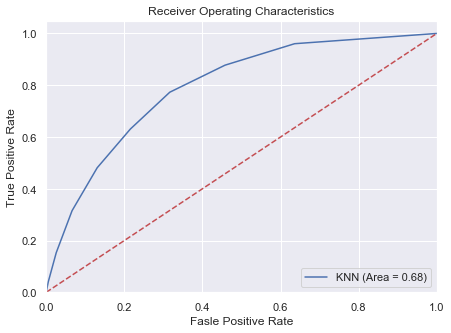

In [84]:
y_pred_knn = knn.predict(X_test)

knn_roc_auc = roc_auc_score(y_test,y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (Area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [85]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[1352,  203],
       [ 288,  267]], dtype=int64)

In [86]:
classify_knn = classification_report(y_test, y_pred_knn)
print(classify_knn)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1555
           1       0.57      0.48      0.52       555

   micro avg       0.77      0.77      0.77      2110
   macro avg       0.70      0.68      0.68      2110
weighted avg       0.76      0.77      0.76      2110



In [87]:
# Comparing performance of the 4 models

performance = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors'], 
               'Accuracy (%)': [80, 72,78, 77], 
               'Sensitivity (%)': [52, 49, 47, 48], 
               'Specificity (%)': [91, 81, 89, 87]
              }
perf = pd.DataFrame(data=performance)
perf

,Model,Accuracy (%),Sensitivity (%),Specificity (%)
0,Logistic Regression,80,52,91
1,Decision Tree,72,49,81
2,Random Forest,78,47,89
3,K Nearest Neighbors,77,48,87


In [90]:
perf = perf.set_index('Model')

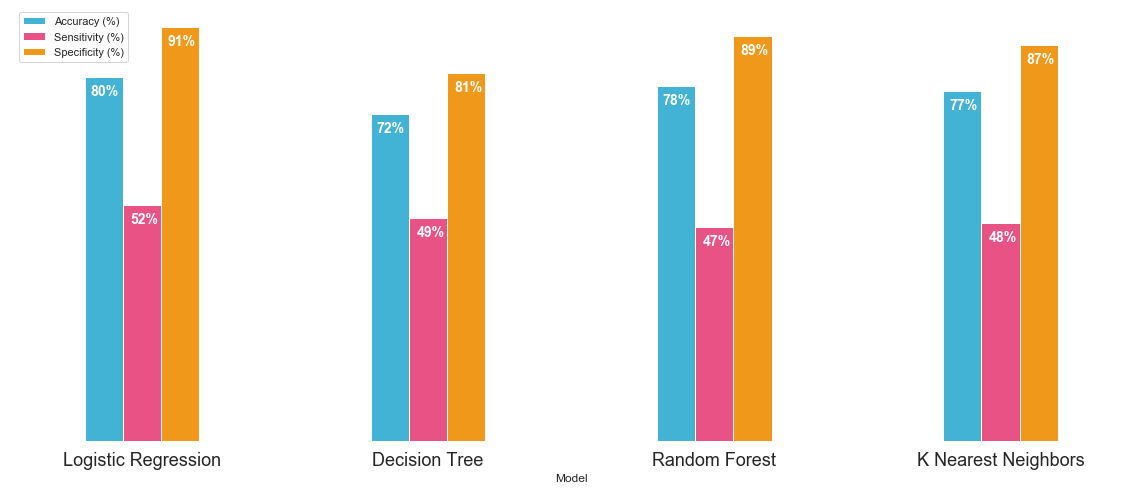

In [91]:
sns.set_style(style='white')

ax = perf.plot(kind='bar', figsize=(20,8), width=0.4, color=['#42b3d5', '#e85285', '#f09819'], fontsize=18)

ax.legend(loc='best')
plt.xticks(rotation=0, ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(False)
ax.spines['left'].set_linewidth(False)

ax.get_yaxis().set_visible(False)

for n in range(3):
    for index, val in enumerate(perf.iloc[:,n].transpose()): 
        label=str(val) + '%'
        
        if n==0:
            ax.annotate(label, xy=(index - 0.18, val-4), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==1:
            ax.annotate(label, xy=(index - 0.04, val-4), color='#ffffff', fontsize=14, fontweight='bold')
        elif n==2:
            ax.annotate(label, xy=(index + 0.09, val-4), color='#ffffff', fontsize=14, fontweight='bold')